In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import db_singlemuts as parent_script
import _config

design_df = pd.read_csv(_config.DATA_DIR + 'exp_design.csv')

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [2]:
ddf = dict()
mdf = pd.DataFrame()
for nm in design_df['Short name']:
    df = pd.read_csv(parent_script.out_dir + f'{nm}.csv', index_col = 0)
    df['Condition'] = nm
    ddf[nm] = df
    
    mdf = mdf.append(df, ignore_index = True)
    
pv_df = mdf.pivot(index = 'Mutation', columns = 'Condition', values = 'Frequency')

In [3]:
pv_df = pv_df.fillna(value = 0)

## t

In [4]:
max_fqs = pv_df.apply(max, axis = 'columns')

In [5]:
max_fqs = max_fqs.reset_index().sort_values(by = 0, ascending = False).reset_index(drop = True)
max_fqs = max_fqs.rename(columns = {0: 'Max frequency'})

In [6]:
max_fqs['Index'] = max_fqs.index

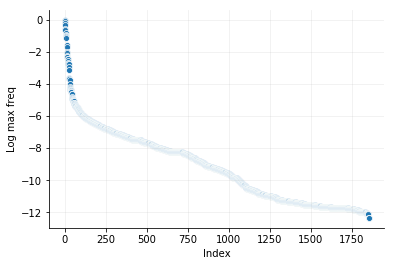

In [7]:
max_fqs['Log max freq'] = np.log(max_fqs['Max frequency'])

sns.scatterplot(
    x = 'Index',
    y = 'Log max freq',
    data = max_fqs,
)
sns.despine()
plt.grid(alpha = 0.2)

In [8]:
for threshold in [0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]:
    print(threshold, '\t', sum(max_fqs['Max frequency'] >= threshold))

0.5 	 6
0.4 	 7
0.3 	 12
0.2 	 13
0.1 	 18
0.09 	 19
0.08 	 22
0.07 	 23
0.06 	 26
0.05 	 27
0.04 	 28
0.03 	 28
0.02 	 32
0.01 	 43


In [9]:
max_fqs[max_fqs['Max frequency'] >= 0.05]

,Mutation,Max frequency,Index,Log max freq
0,111R,0.960477,0,-0.040325
1,149Y,0.917480,1,-0.086125
2,165T,0.814810,2,-0.204801
3,119N,0.717727,3,-0.331666
4,109S,0.551501,4,-0.595111
5,26G,0.525388,5,-0.643619
6,106I,0.423970,6,-0.858092
7,23L,0.391144,7,-0.938680
8,158T,0.368602,8,-0.998038
9,167G,0.364193,9,-1.010070


## t2

In [10]:
pv_df['Max fq'] = pv_df.apply(max, axis = 'columns')

In [11]:
pv_dfs = pv_df[pv_df['Max fq'] >= 0.05]
print(pv_dfs.shape)

(27, 100)


In [12]:
pv_dfs.to_csv(parent_script.out_dir + f'_above5.csv')

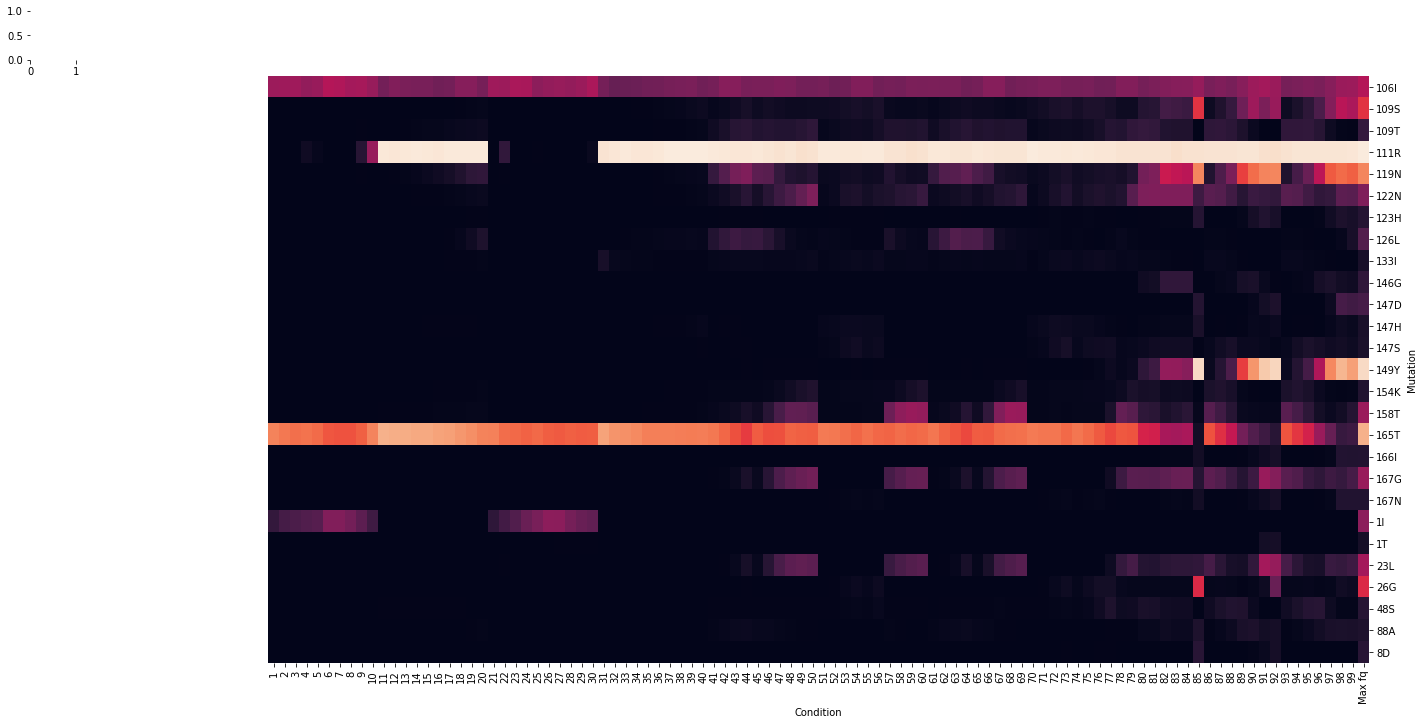

In [13]:
sns.clustermap(
    pv_dfs,
    figsize = (24, 12),
    row_cluster = False,
    col_cluster = False,
    cbar = False,
)

In [73]:
import copy
pv_dfs2 = copy.copy(pv_dfs)
pv_dfs2['Mutation'] = pv_dfs2.index

dfm = pv_dfs2.melt(id_vars = 'Mutation', value_name = 'Frequency')
dfm.head()

,Mutation,Condition,Frequency
0,106I,1,0.981538
1,109S,1,0.000766
2,109T,1,0.001208
3,111R,1,0.015453
4,119N,1,0.000245


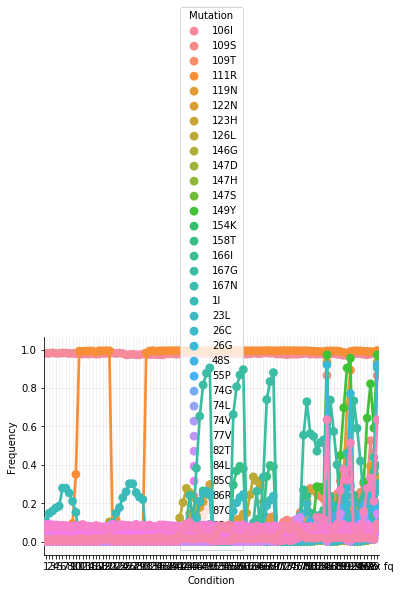

In [74]:
sns.pointplot(
    x = 'Condition',
    y = 'Frequency',
    hue = 'Mutation',
    data = dfm,
)
plt.grid(alpha = 0.2)
sns.despine()